In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
pricedf = pd.read_csv('Dataset/Volume_price.csv')
pricedf

,Volume,Price
0,10,393.10
1,11,471.91
2,14,751.66
3,16,974.26
4,17,1096.39
5,18,1225.74
6,19,1362.31
7,20,1506.10
8,22,1815.34
9,24,2153.46


In [20]:
pricedf.shape

(23, 2)

In [21]:
x = pricedf.iloc[:,:-1].values
print(x)

[[10]
 [11]
 [14]
 [16]
 [17]
 [18]
 [19]
 [20]
 [22]
 [24]
 [27]
 [29]
 [32]
 [35]
 [38]
 [42]
 [46]
 [50]
 [58]
 [64]
 [68]
 [70]
 [90]]


In [22]:
y = pricedf.iloc[:,-1].values
print(y)

[  393.1    471.91   751.66   974.26  1096.39  1225.74  1362.31  1506.1
  1815.34  2153.46  2714.79  3125.11  3794.74  4529.35  5328.94  6496.14
  7778.86  9177.1  12320.14 14980.66 16898.74 17901.1  50000.  ]


In [23]:
pricedf.corr()

,Volume,Price
Volume,1.000000,0.881423
Price,0.881423,1.000000


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg= PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)
regressor=LinearRegression()
regressor.fit(x_poly,y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [29]:
y_pred = regressor.predict(poly_reg.fit_transform(x_test))
print(y_pred) # comparison predict
print(y_test) # and actual

[ 1604.03692558  1381.94839168 22852.83269768  3540.98615167
 21077.62966823]
[ 3125.11  2714.79 17901.1   5328.94 16898.74]


In [30]:
corr = np.corrcoef(y_pred, y_test)
print(corr) # check correlation between predicted and actual.

[[1.         0.99844074]
 [0.99844074 1.        ]]


In [31]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print(MSE)

9853936.916578215


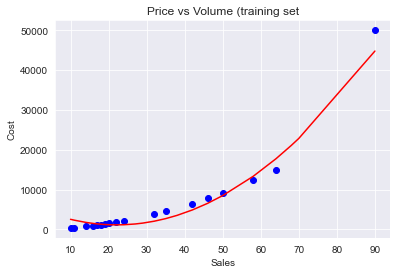

In [35]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x, regressor.predict(poly_reg.fit_transform(x)), color='red')
plt.title('Price vs Volume (training set')
plt.xlabel('Sales')
plt.ylabel('Cost')
plt.show()